In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random


In [58]:
# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [59]:
df_test = pd.read_csv("/content/drive/MyDrive/NSL-KDD/KDDTest+.txt")
df_train = pd.read_csv("/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt")

In [60]:
df_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [61]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df_test.columns = columns
df_train.columns = columns

# sanity check
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [62]:
# map normal to 0, all attacks to 1
is_attack = df_train.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = df_test.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df_train['attack_flag'] = is_attack
df_test['attack_flag'] = test_attack

# view the result
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0


In [63]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0

    return attack_type

# map the data and join to the data set
attack_map = df_train.attack.apply(map_attack)
df_train['attack_map'] = attack_map

test_attack_map = df_test.attack.apply(map_attack)
df_test['attack_map'] = test_attack_map

# view the result
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1,2
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1,2
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0,0


In [64]:

# use a crosstab to get attack vs protocol
attack_vs_protocol = pd.crosstab(df_train.attack, df_train.protocol_type)
attack_vs_protocol


protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [66]:

# helper function for drawing mulitple charts.
def bake_pies(data_list,labels):
    list_length = len(data_list)

    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}

    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)

    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list):

        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)

        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])

    return axs

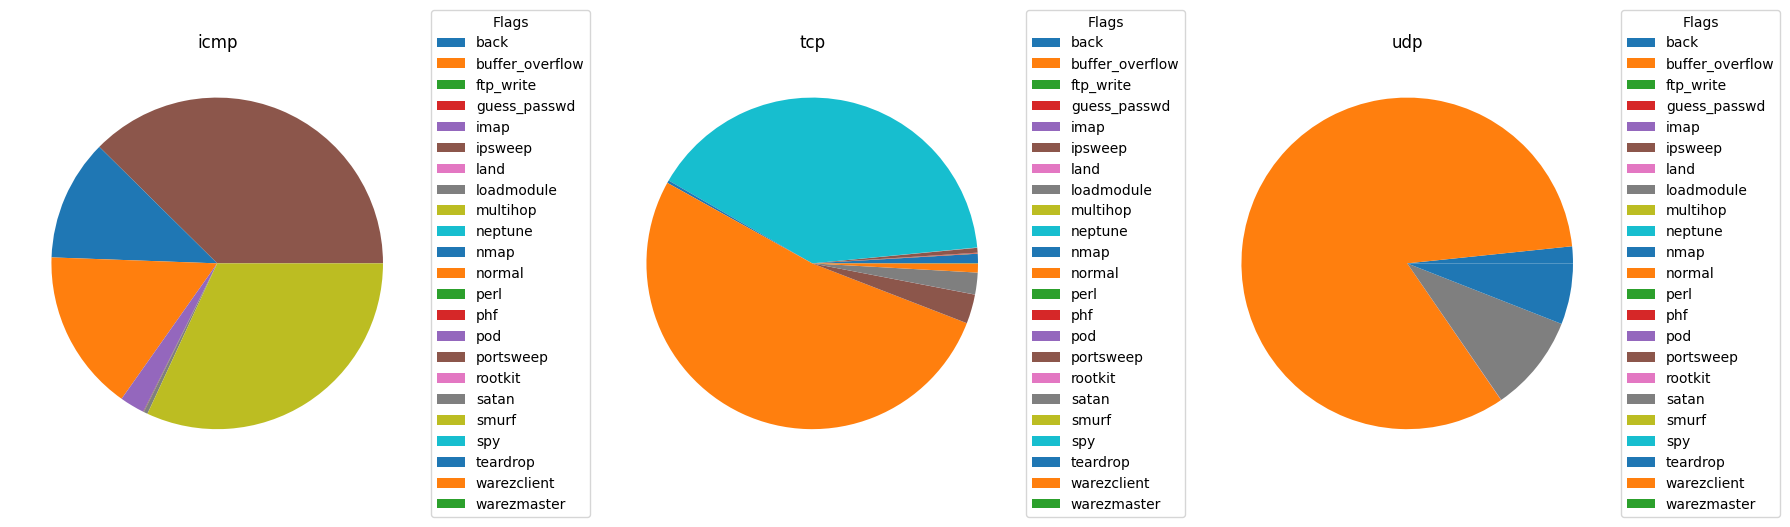

In [67]:

# get the series for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

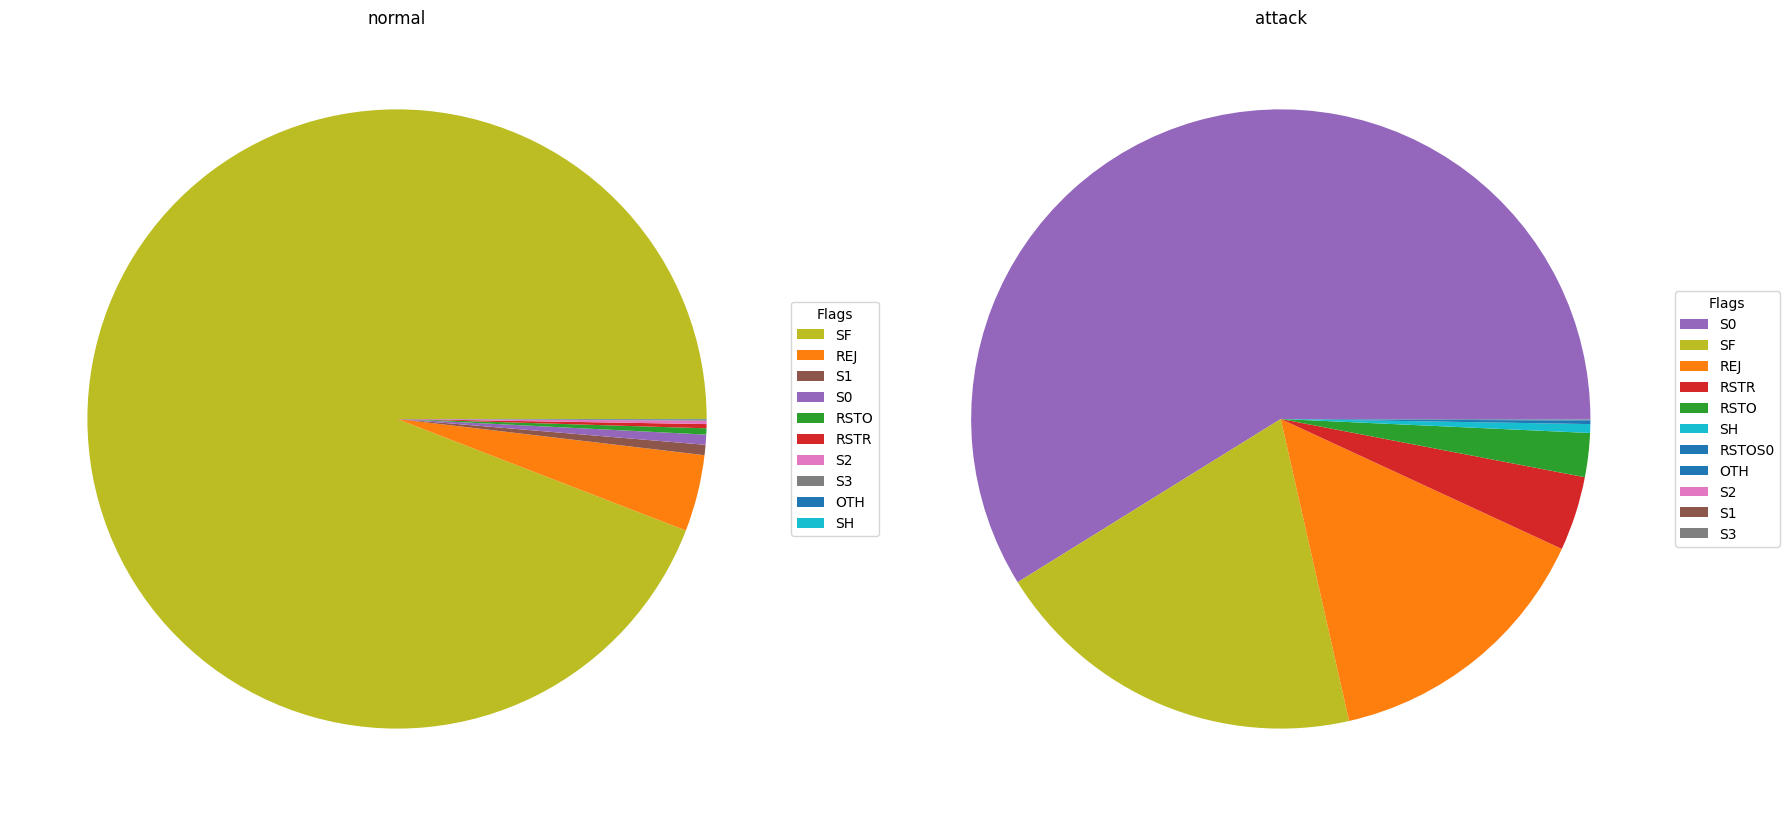

In [68]:
# get a series with the count of each flag for attack and normal traffic
normal_flags = df_train.loc[df_train.attack_flag == 0].flag.value_counts()
attack_flags = df_train.loc[df_train.attack_flag == 1].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])
plt.show()

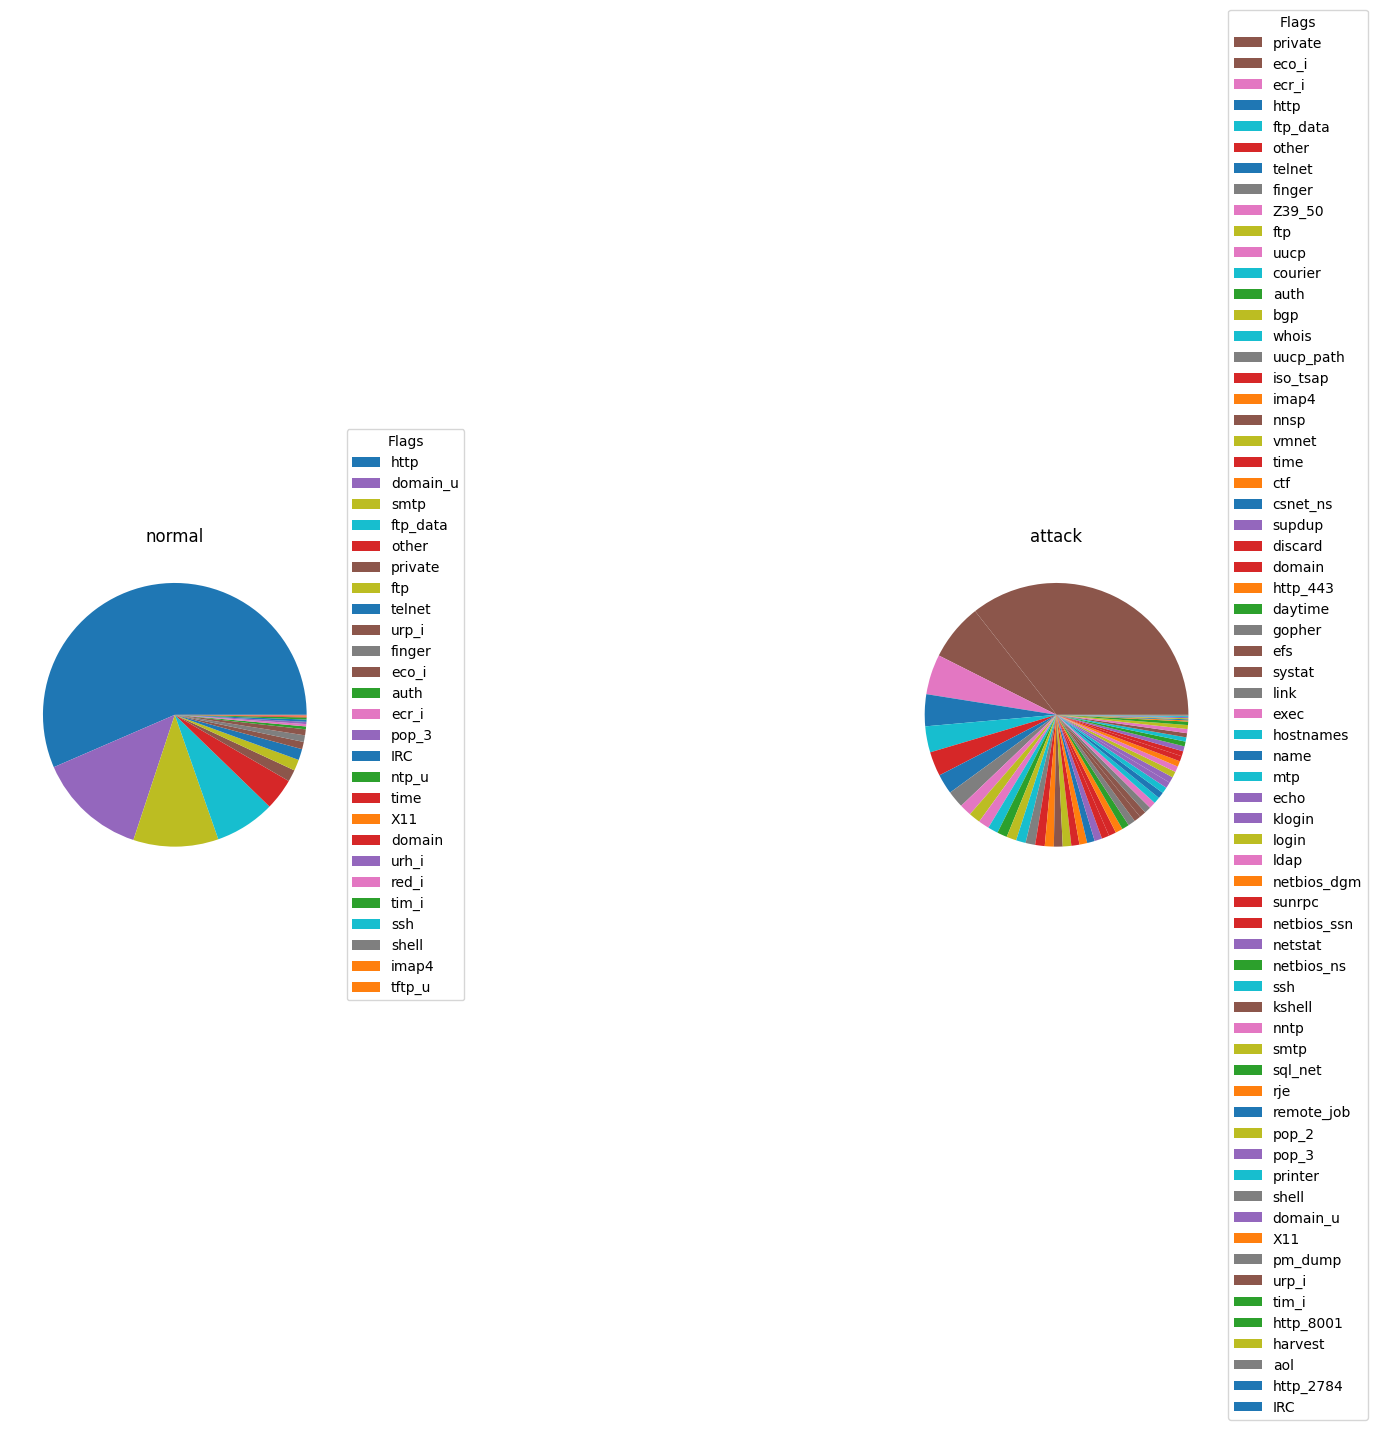

In [69]:
# get a series with the count of each service for attack and normal traffic
normal_services = df_train.loc[df_train.attack_flag == 0].service.value_counts()
attack_services = df_train.loc[df_train.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])
plt.show()

In [70]:
from sklearn.preprocessing import RobustScaler

def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [71]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'attack']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['attack'] == "normal", "attack"] = 0
    dataframe.loc[dataframe['attack'] != 0, "attack"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [72]:
scaled_train = preprocess(df_train)

In [73]:
scaled_train = preprocess(df_test)

In [74]:
import pandas as pd

# df_train과 df_test는 각각 훈련 및 테스트 데이터프레임이라고 가정합니다.
# 여기에는 데이터프레임이 정의되어 있다고 가정합니다. 실제 코드에서는 데이터를 로드해야 합니다.
# df_train = pd.read_csv("train_dataset.csv")
# df_test = pd.read_csv("test_dataset.csv")

# int64를 int32로 변환
int_columns_train = df_train.select_dtypes(include=['int64']).columns
df_train[int_columns_train] = df_train[int_columns_train].astype('int32')

int_columns_test = df_test.select_dtypes(include=['int64']).columns
df_test[int_columns_test] = df_test[int_columns_test].astype('int32')

# float64를 float32로 변환
float_columns_train = df_train.select_dtypes(include=['float64']).columns
df_train[float_columns_train] = df_train[float_columns_train].astype('float32')

float_columns_test = df_test.select_dtypes(include=['float64']).columns
df_test[float_columns_test] = df_test[float_columns_test].astype('float32')

# 변환된 데이터프레임 확인
print("df_train 데이터 타입:")
print(df_train.dtypes)

print("\ndf_test 데이터 타입:")
print(df_test.dtypes)


df_train 데이터 타입:
protocol_type                   object
service                         object
flag                            object
land                             int32
logged_in                        int32
is_host_login                    int32
is_guest_login                   int32
attack                          object
level                            int32
duration                       float32
src_bytes                      float32
dst_bytes                      float32
wrong_fragment                 float32
urgent                         float32
hot                            float32
num_failed_logins              float32
num_compromised                float32
root_shell                     float32
su_attempted                   float32
num_root                       float32
num_file_creations             float32
num_shells                     float32
num_access_files               float32
num_outbound_cmds              float32
count                          float32
srv_coun

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                125972 non-null  object 
 1   service                      125972 non-null  object 
 2   flag                         125972 non-null  object 
 3   land                         125972 non-null  int32  
 4   logged_in                    125972 non-null  int32  
 5   is_host_login                125972 non-null  int32  
 6   is_guest_login               125972 non-null  int32  
 7   attack                       125972 non-null  object 
 8   level                        125972 non-null  int32  
 9   duration                     125972 non-null  float32
 10  src_bytes                    125972 non-null  float32
 11  dst_bytes                    125972 non-null  float32
 12  wrong_fragment               125972 non-null  float32
 13 

In [76]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [77]:
df_train.isnull().sum()

protocol_type                  0
service                        0
flag                           0
land                           0
logged_in                      0
is_host_login                  0
is_guest_login                 0
attack                         0
level                          0
duration                       0
src_bytes                      0
dst_bytes                      0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_r

In [78]:
df_test.isnull().sum()

protocol_type                  0
service                        0
flag                           0
land                           0
logged_in                      0
is_host_login                  0
is_guest_login                 0
attack                         0
level                          0
duration                       0
src_bytes                      0
dst_bytes                      0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_r

In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                125972 non-null  object 
 1   service                      125972 non-null  object 
 2   flag                         125972 non-null  object 
 3   land                         125972 non-null  int32  
 4   logged_in                    125972 non-null  int32  
 5   is_host_login                125972 non-null  int32  
 6   is_guest_login               125972 non-null  int32  
 7   attack                       125972 non-null  object 
 8   level                        125972 non-null  int32  
 9   duration                     125972 non-null  float32
 10  src_bytes                    125972 non-null  float32
 11  dst_bytes                    125972 non-null  float32
 12  wrong_fragment               125972 non-null  float32
 13 

In [85]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df_train['Encoded_protocol_type'] = label_encoder.fit_transform(df_train['protocol_type'])
df_train['Encoded_protocol_service'] = label_encoder.fit_transform(df_train['service'])

df_test['Encoded_protocol_type'] = label_encoder.fit_transform(df_test['protocol_type'])
df_test['Encoded_protocol_service'] = label_encoder.fit_transform(df_test['service'])

In [86]:
# X에는 attack_flag를 제외한 데이터를 넣습니다.
X = df_train.drop(columns=['attack_flag', 'flag', 'attack', 'service', 'protocol_type']).values
X_test = df_test.drop(columns=['attack_flag', 'flag', 'attack', 'service', 'protocol_type']).values

# y에는 attack_flag를 넣습니다.
y = df_train['attack_flag'].values
y_test = df_test['attack_flag'].values


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=21)

In [88]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [89]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)

(113370, 5, 42) (113370,)
(12594, 5, 42) (12594,)


In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((113370, 5, 42), (12594, 5, 42), (113370,), (12594,))

In [91]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [92]:
def SE_Block(inputs, num_filters, ratio):
    squeeze = tf.keras.layers.GlobalAveragePooling1D()(inputs)

    excitation = tf.keras.layers.Dense(units=num_filters/ratio)(squeeze)
    excitation = tf.keras.layers.Activation('relu')(excitation)
    excitation = tf.keras.layers.Dense(units=num_filters)(excitation)
    excitation = tf.keras.layers.Activation('sigmoid')(excitation)
    excitation = tf.keras.layers.Reshape([1, num_filters])(excitation)

    scale = inputs * excitation

    return scale

In [93]:
def Conv_1D_Block(inputs, num_filters, kernel, strides):
    # 1D Convolutional Block with BatchNormalization
    x = tf.keras.layers.Conv1D(num_filters, kernel, strides=strides, padding="same", kernel_initializer="he_normal")(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    return x

In [94]:
def residual_block(inputs, num_filters, ratio):
    # Construct a Residual Block of Convolutions
    # x        : input into the block
    # n_filters: number of filters
    shortcut = inputs
    #
    conv = Conv_1D_Block(inputs, num_filters, 3, 1)
    conv = Conv_1D_Block(conv, num_filters, 3, 1)
    conv = SE_Block(conv, num_filters, ratio)
    conv = tf.keras.layers.Add()([conv, shortcut])
    out = tf.keras.layers.Activation('relu')(conv)

    return out

In [120]:
def ResBlock(input_layer, num_units):
    x = input_layer
    for _ in range(num_units):
        shortcut = x
        x = Conv1D(filters=42, kernel_size=3, activation='relu', padding='same')(x)
        x = Add()([x, shortcut])
        x = Activation('relu')(x)
    return x


In [121]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]
print(n_timesteps, n_features, n_outputs)

5 42 2


In [122]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout
from tensorflow import keras
from keras.layers import Input, Dense, Conv1D, Flatten, Add, Activation
from keras.models import Model

num_filters = 3
ratio = 1
num_units = 8
n_features =42

inputs= Input(shape=(n_timesteps,n_features))

residual_output = ResBlock(inputs, num_units)
conv1  = Conv1D(filters=32, kernel_size=5, activation='relu')(residual_output)

x = Flatten()(conv1)
x = Dense(32, activation='relu')(x)
outputs = Dense(n_outputs, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 5, 42)]              0         []                            
                                                                                                  
 conv1d_90 (Conv1D)          (None, 5, 42)                5334      ['input_13[0][0]']            
                                                                                                  
 add_12 (Add)                (None, 5, 42)                0         ['conv1d_90[0][0]',           
                                                                     'input_13[0][0]']            
                                                                                                  
 activation_6 (Activation)   (None, 5, 42)                0         ['add_12[0][0]']        

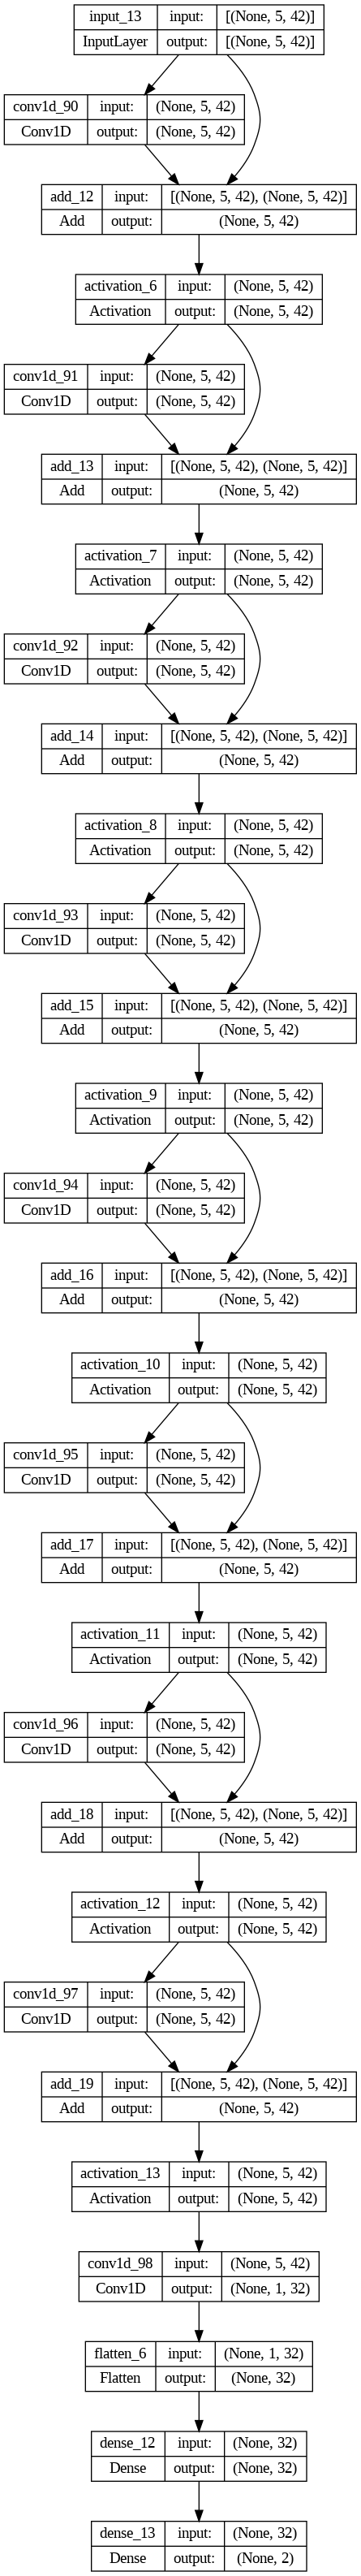

In [123]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [124]:
validation_split = 0.1
history = model.fit(X_train, y_train_onehot, batch_size= 192, epochs=20, verbose=True,  validation_split=validation_split)

Epoch 1/20
532/532 [==============================] - 11s 10ms/step - loss: 35.2762 - accuracy: 0.5396 - val_loss: 3.4169 - val_accuracy: 0.5866
Epoch 2/20
532/532 [==============================] - 4s 7ms/step - loss: 16.2798 - accuracy: 0.5800 - val_loss: 15.4734 - val_accuracy: 0.4845
Epoch 3/20
532/532 [==============================] - 4s 7ms/step - loss: 11.6724 - accuracy: 0.6915 - val_loss: 6.7219 - val_accuracy: 0.7693
Epoch 4/20
532/532 [==============================] - 5s 9ms/step - loss: 3.9802 - accuracy: 0.8183 - val_loss: 5.2296 - val_accuracy: 0.8871
Epoch 5/20
532/532 [==============================] - 4s 7ms/step - loss: 4.2654 - accuracy: 0.8527 - val_loss: 1.7036 - val_accuracy: 0.9031
Epoch 6/20
532/532 [==============================] - 4s 7ms/step - loss: 0.8061 - accuracy: 0.9173 - val_loss: 1.8049 - val_accuracy: 0.9159
Epoch 7/20
532/532 [==============================] - 5s 9ms/step - loss: 0.6234 - accuracy: 0.9292 - val_loss: 0.1752 - val_accuracy: 0.9349


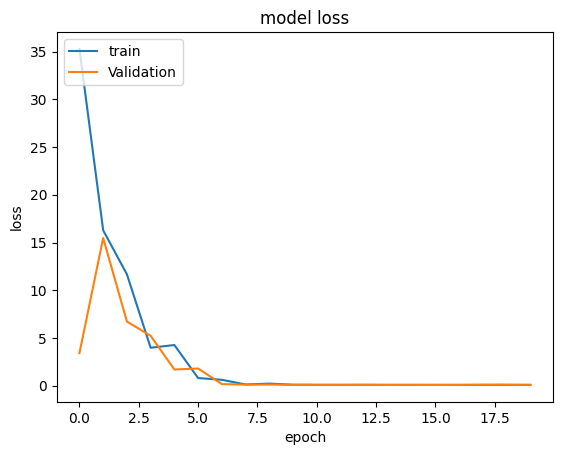

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

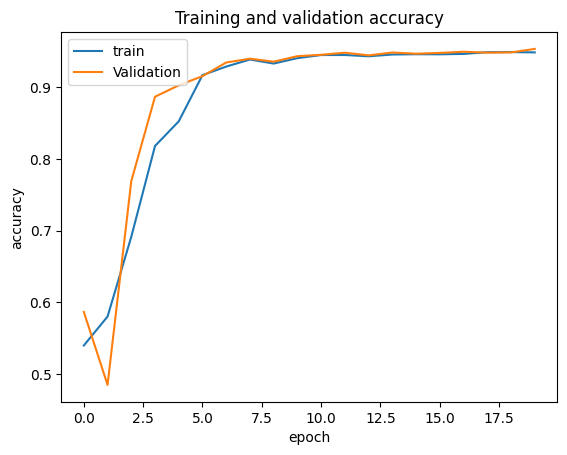

In [126]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [132]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_onehot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))

394/394 [==============================] - 2s 4ms/step
f1_score =  0.9483042518389201
0.9484675242178815
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6746
           1       0.98      0.91      0.94      5848

    accuracy                           0.95     12594
   macro avg       0.95      0.95      0.95     12594
weighted avg       0.95      0.95      0.95     12594

